# Application Question

The demo data set for this part is the Wesenheit index of the OGLE-III fundamental-mode and first overtone classical Cepheids. 

These stars are awesome because you can use them to measure distances. Here's a nice [youtube video](https://www.youtube.com/watch?v=iyisAjHdhas) on these stars.

You'll try to estimate their period-luminosity relationship. 

The Wesenheit index is defined as `W = I - 1.55(V - I)`, and its main advantage over using simply the I or V photometry is that it is insensitive to extinction. It is denoted by 'W' among the data columns. 

Other columns are 'name', the identifier of the star; 'RA0' (in decimal hours) and 'Decl0' (in decimal degrees), celestial coordinates; 'Mode', the mode of the Cepheid ('F' indicates fundamental-mode, '1' indicates first overtone star); 'Cloud', indicating which Magellanic Cloud the star belongs to; 'logP1', the base-10 logarithm of the period in days; 'VI', the colour V-I.

We split the data into LMC and SMC, and then again by mode F and 1 (for you) below:

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import linregress, norm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read in the csv data file using Pandas
cep = pd.read_csv("Cepheids.csv")
print(cep.columns)

Index(['name', 'RA0', 'Decl0', 'Mode', 'Cloud', 'W', 'logP1', 'VI'], dtype='object')


In [3]:
#select Cepheids belonging to the LMC and SMC clouds with F and 1 modes
lmcf = cep[(cep['Cloud'] == 'LMC') & (cep['Mode'] == 'F')]
smcf = cep[(cep['Cloud'] == 'SMC') & (cep['Mode'] == 'F')]

lmco = cep[(cep['Cloud'] == 'LMC') & (cep['Mode'] == '1')]
smco = cep[(cep['Cloud'] == 'SMC') & (cep['Mode'] == '1')]

## Part 1: plot the `W` on the y-axis vs `log(P1)` on x.

#### Individual Plots

In [4]:
labels = ["lmcf", "smcf", "lmco", "smco"]
dflist = [lmcf,smcf,lmco,smco]

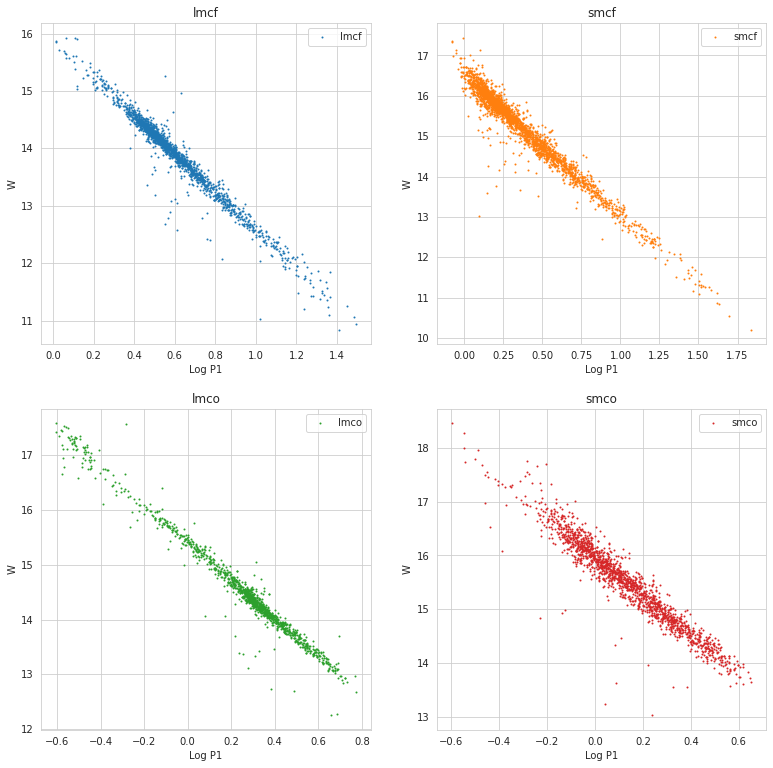

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(13,13))
for n,df in enumerate(dflist):
    i = int(n/2)
    j = int(n % 2)
    x = df["logP1"].values
    y = df["W"].values
    axs[i,j].scatter(x,y,s=1,label=labels[n],c=sns.color_palette()[n])
    axs[i,j].set_title(labels[n])
    axs[i,j].set_xlabel("Log P1")
    axs[i,j].set_ylabel("W")
    axs[i,j].legend()
plt.show()

#### All in 1 Plot

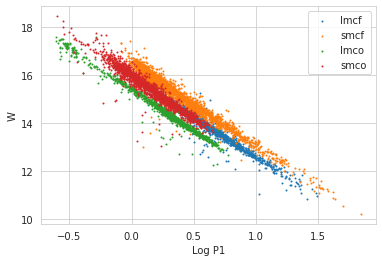

In [6]:
plt.scatter(lmcf["logP1"].values,lmcf["W"].values,s=1,label="lmcf")
plt.scatter(smcf["logP1"].values,smcf["W"].values,s=1,label="smcf")
plt.scatter(lmco["logP1"].values,lmco["W"].values,s=1,label="lmco")
plt.scatter(smco["logP1"].values,smco["W"].values,s=1,label="smco")
plt.xlabel("Log P1")
plt.ylabel("W")
plt.legend()

plt.legend()
plt.show()

## Part 2: Fit or estimate straight lines to each of the four samples
Note: You can use any fitting function/algorithm you like (i.e. statsmodels, astropy, scipy, numpy, etc..).

In [7]:
eqlist = []

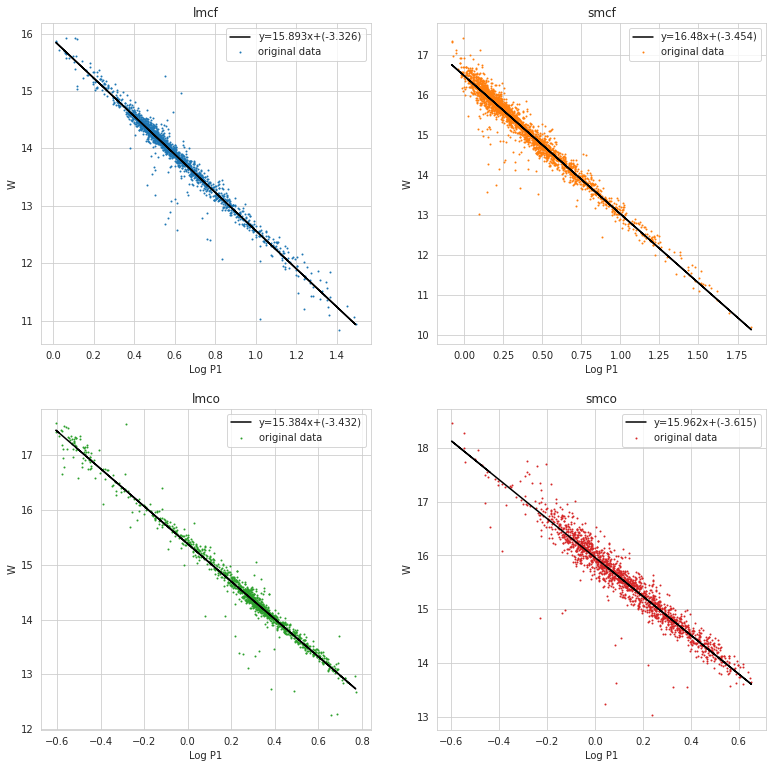

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(13,13))
for n,df in enumerate(dflist):
    i = int(n/2)
    j = int(n % 2)
    x = df["logP1"].values
    y = df["W"].values
    axs[i,j].scatter(x,y,s=1,c=sns.color_palette()[n],label="original data")
    res = linregress(x, y)
    df["W_pred"] = res.intercept + res.slope*x
    eq = f"y={np.round(res.intercept,3)}x+({np.round(res.slope,3)})"
    eqlist.append(eq)
    axs[i,j].plot(x, res.intercept + res.slope*x, c="black", label=eq)
    axs[i,j].set_title(labels[n])
    axs[i,j].set_xlabel("Log P1")
    axs[i,j].set_ylabel("W")
    axs[i,j].legend()

In [9]:
print("The linear regression-fitted equations are:")
for i in range(len(labels)):
    print(f"{labels[i]}: {eqlist[i]}")

The linear regression-fitted equations are:
lmcf: y=15.893x+(-3.326)
smcf: y=16.48x+(-3.454)
lmco: y=15.384x+(-3.432)
smco: y=15.962x+(-3.615)


## Part 3: Compute the residuals of each sample to its respective line.
Do these residuals look like a normal distribution? If not, speculate on why (WATCH THE YOUTUBE VIDEO!)

In [10]:
print("The residuals will be calculated in a new column 'Residual' ")

The residuals will be calculated in a new column 'Residual' 


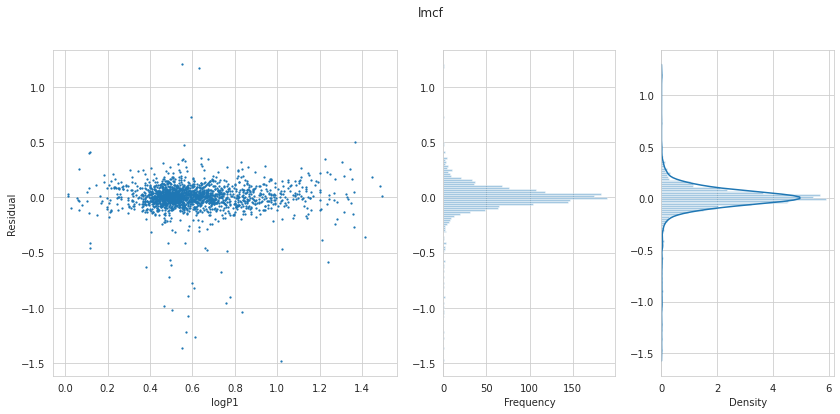

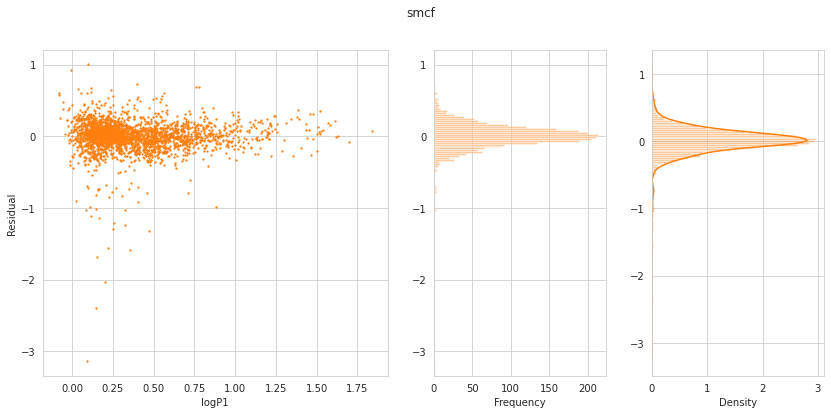

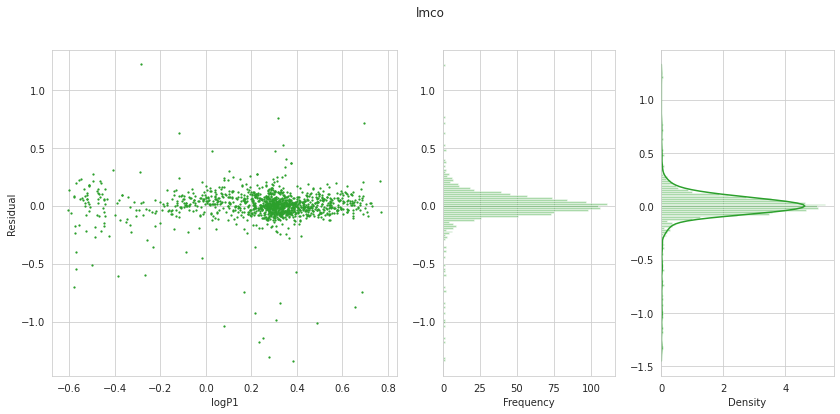

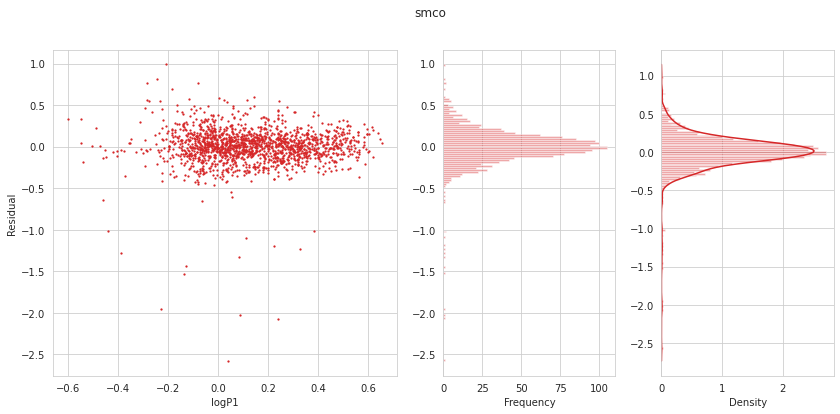

In [11]:
for n,df in enumerate(dflist):
    df["Residual"] = df["W"] - df["W_pred"] # Residual = Actual - Predicted
    
    x = df["logP1"].values
    y = df["Residual"].values
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3,sharey=False,figsize=(14,6),gridspec_kw={'width_ratios': [2, 1, 1]})
    ax1.scatter(x,y,s=1.5,c=sns.color_palette()[n])
    ax1.set_xlabel("logP1")
    ax1.set_ylabel("Residual")
    ymin, ymax = ax1.get_ylim()
    # ax2.hist(y,range=ylims,orientation="horizontal",bins=50)
    sns.distplot(y, ax=ax2, color=sns.color_palette()[n], vertical=True, kde=False,bins=150)
    ax2.set_xlabel("Frequency")
    sns.distplot(y, ax=ax3, color=sns.color_palette()[n], vertical=True, kde=True,bins=150)
    plt.suptitle(labels[n])
plt.show()

No, the residuals do not look like a normal distribution. The main reason is that there are quite a few "outliers" having a negative residual as compared to a positive residual. While this number is not huge, we can still see this in the above plot.

Further, from the residual plot, we see that the variance in the residual is not the same for different logP1 value. This thus means that logP1 is not homoscedastic with respect to W.

We can also see that it is not a normal distribution by looking at the quantile plot:

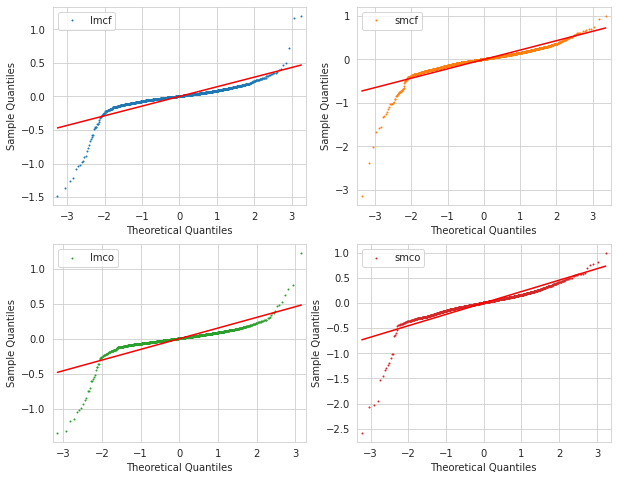

In [12]:
import statsmodels.api as sm
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(10,8))
axlist = [ax1,ax2,ax3,ax4]
for i,df in enumerate(dflist):
    sm.qqplot(df["Residual"].values,ax=axlist[i],color=sns.color_palette()[i],ms=1,label = labels[i],line="s")
    axlist[i].legend()
plt.show()

The fact that the residuals (and hence the errors) are not normally distributed point is indicated by the above scatter. 


This scatter cannot be due to reddening effects, because the Wesenheit index (W) is insensitive to extinction. So, it must point to the fact that there is some error in the data due to photometry which leads to the measurement of a lower value of W (than actual).

We also notice that the residual is larger and negative for lower values of logP1 (periodicity). From the video, we know that a Cepheid variable having a lower periodicity has a lower luminosity as well. Thus, because of this lower luminosity, photometry might be more difficult, and the relative error would be higher for these samples.

As per [[1]](https://doi.org/10.1111/j.1365-2966.2005.09092.x), this might be related to the finite width of the instability strip in the HR Diagram as well.


---
[1]: Ngeow, C.-C. and Kanbur, S.M. (2005), The linearity of the Wesenheit function for the Large Magellanic Cloud Cepheids. Monthly Notices of the Royal Astronomical Society, 360: 1033-1039. https://doi.org/10.1111/j.1365-2966.2005.09092.x



## Part 4: Scatter plot of the residuals as RA (x-axis) vs Dec (y-axis) color-coded by whether they are positive or negative.
What do you see?

In [13]:
for df in dflist:
    df.loc[df["Residual"]>0, "color_category"] = "positive"
    df.loc[df["Residual"]<0, "color_category"] = "negative"
    df.loc[df["Residual"]==0, "color_category"] = "zero"

#### Individual Plots

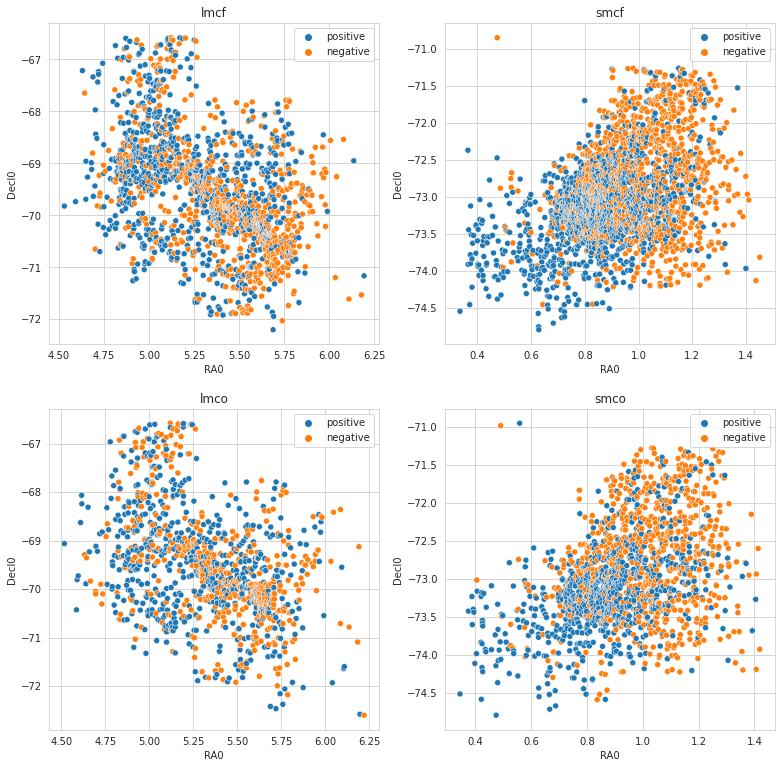

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(13,13))
for n,df in enumerate(dflist):
    i = int(n/2)
    j = int(n % 2)
    sns.scatterplot(data=df,x='RA0', y='Decl0', hue='color_category',ax =axs[i,j])
    axs[i,j].set_title(labels[n])
    axs[i,j].legend()
plt.show()

#### All in 1 Plot

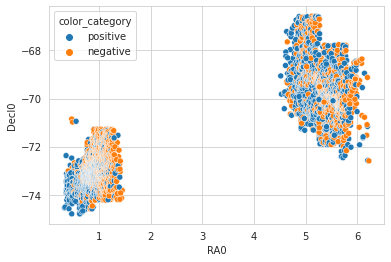

In [15]:
bigdf = pd.concat(dflist)
sns.scatterplot(data=bigdf,x='RA0', y='Decl0', hue='color_category')
plt.show()

We clearly see that there is clearly a correlation between the RA and the sign of the residual. The samples having a lower RA are more likely to have a positive residual, implying that the W reading will be taken higher than actual. On the other hand, the samples having a higher RA are more likely to have a negative residual.

My guess for why this might be the case is that in the definition of the Wesenheit index, where we have taken the value 1.55. This value 1.55 might have been calibrated based on the dereddening for the average RA location of the LMC and the SMC. Since the deredenning might be different for different RA positions of the LMC and SMC, this might be the reason that we see the above correlation between RA/Dec and Residuals.